# Importing and creating dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
cd C:\Users\hp

C:\Users\hp


C:/Users/hp/Downloads/seismic\fault


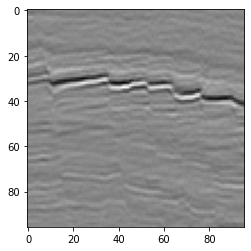

In [3]:
DATADIR = "C:/Users/hp/Downloads/seismic"

CATEGORIES = ["fault", "salt", "other"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    print(path)
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array)

[[117 118 120 ... 131 129 131]
 [108 106 104 ... 131 132 128]
 [125 121 118 ... 124 125 127]
 ...
 [142 141 138 ... 138 137 135]
 [127 125 127 ... 116 116 116]
 [125 127 128 ... 113 113 116]]


In [5]:
print(img_array.shape)

(96, 96)


In [6]:
IMG_SIZE = 96  #Check with different sizes

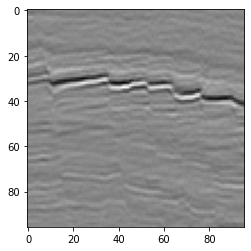

In [7]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=fault 1=salt 2=other

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [9]:
create_training_data()

100%|██████████| 500/500 [00:01<00:00, 457.14it/s]


In [10]:
print(len(training_data))

1500


In [11]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:100]:
    print(sample[1])

2
1
0
1
1
0
2
1
2
0
1
1
1
0
0
0
1
2
2
0
0
2
0
1
2
1
2
1
0
2
0
2
0
1
0
2
2
0
1
1
2
2
1
1
1
2
1
0
0
1
2
1
0
2
1
0
0
2
2
0
1
2
2
2
0
2
2
2
0
0
2
2
1
1
0
1
1
0
0
0
1
1
0
0
1
2
2
0
1
0
0
1
0
1
0
1
0
0
0
0


In [13]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [14]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [15]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

[[[[119]
   [117]
   [110]
   ...
   [109]
   [108]
   [106]]

  [[ 73]
   [ 92]
   [110]
   ...
   [ 85]
   [ 86]
   [ 86]]

  [[ 87]
   [ 74]
   [ 63]
   ...
   [108]
   [108]
   [109]]

  ...

  [[107]
   [115]
   [111]
   ...
   [113]
   [110]
   [103]]

  [[ 92]
   [103]
   [122]
   ...
   [116]
   [114]
   [113]]

  [[116]
   [114]
   [102]
   ...
   [ 86]
   [ 92]
   [ 97]]]]


In [ ]:
##save this data in a so that we can play with it again

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
##Import the data in completely new file

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, train_size=0.8)

# Model Builiding

In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [18]:
X_train = X_train/255.0
X_test = X_test/255

In [19]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', #'binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
y_train = np.array(y_train)

In [21]:
model.fit(X_train, y_train, batch_size=32, epochs=3)#, validation_split=0.3)

Epoch 1/3
38/38 [==============================] - 89s 2s/step - loss: 0.0000e+00 - accuracy: 0.3325
Epoch 2/3
38/38 [==============================] - 88s 2s/step - loss: 0.0000e+00 - accuracy: 0.3333
Epoch 3/3
38/38 [==============================] - 88s 2s/step - loss: 0.0000e+00 - accuracy: 0.3333


In [22]:
y_pred = model.predict([X_test])

In [23]:
len(y_pred)

300

In [24]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)

In [25]:
accuracy

0.3333333333333333

# Creating visualisation (for loss and accuracy)

In [26]:
from tensorflow.keras.callbacks import TensorBoard

In [27]:
NAME = "faults-vs-salts-CNN"

In [28]:
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))     #Type 'tensorboard --logdir=logs/' in anaconda command prompt

In [29]:
y = np.array(y)

In [30]:
model.fit(X, y,
          batch_size=32,
          epochs=3,
          validation_split=0.3,
          callbacks=[tensorboard])

Epoch 1/3
33/33 [==============================] - 85s 3s/step - loss: 0.0000e+00 - accuracy: 0.3438 - val_loss: 0.0000e+00 - val_accuracy: 0.3089
Epoch 2/3
33/33 [==============================] - 86s 3s/step - loss: 0.0000e+00 - accuracy: 0.3438 - val_loss: 0.0000e+00 - val_accuracy: 0.3089
Epoch 3/3
33/33 [==============================] - 85s 3s/step - loss: 0.0000e+00 - accuracy: 0.3438 - val_loss: 0.0000e+00 - val_accuracy: 0.3089
